In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import stats
import math
pd.options.display.max_rows=200
import seaborn as sns

In [13]:
import math

In [45]:
%matplotlib inline

In [2]:
pd.options.display.max_columns=30

In [4]:
df_id_real_pred = pd.read_csv('211108Mon_prosit_noise.csv')

In [280]:
df_id_real_pred.head(2)

,Precursor_pred,IsotopeError_pred,PrecursorError(ppm)_pred,Peptide_pred,Protein_pred,MSGFScore_pred,SpecEValue_pred,EValue_pred,MZ_pred,INT_pred,PEP,CHA,Precursor_real,IsotopeError_real,PrecursorError(ppm)_real,Peptide_real,Protein_real,MSGFScore_real,SpecEValue_real,EValue_real,MZ_real,INT_real
0,1148.54220,0,0.000000,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,"sp|P07858|CATB_HUMAN(pre=R,post=I);tr|R4GMQ5|R...",213,3.842356e-39,1.063139e-31,147.112804167;294.18121816699994;441.249632166...,0.24706785;0.4907155;0.21187675;0.36394352;0.4...,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,3,1148.54220,0,0.000000,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,"sp|P07858|CATB_HUMAN(pre=R,post=I);tr|R4GMQ5|R...",79,2.073257e-16,5.736481e-09,120.08077239990234;126.05509185791016;129.1025...,23000.103515625;14412.4521484375;16642.2246093...
1,984.49884,0,0.061996,PYFLTDGTGTVTPANASGINDGAAAVVLMK,"sp|Q9BWD1|THIC_HUMAN(pre=K,post=K)",234,2.212097e-38,6.120636e-31,147.112804167;278.15328916699997;391.237353167...,0.19555475;0.3118106;0.42195186;0.52578694;0.2...,PYFLTDGTGTVTPANASGINDGAAAVVLMK,3,984.49884,0,0.061996,PYFLTDGTGTVTPANASGINDGAAAVVLMK,"sp|Q9BWD1|THIC_HUMAN(pre=K,post=K)",212,8.474427e-31,2.344784e-23,120.08137512207031;129.1028594970703;130.08676...,21733.4375;22421.587890625;23938.779296875;607...


# 2d : real VS pred
 - msgf
 - evalue
 - specevalue

In [5]:
real_pred_msgf = df_id_real_pred[['MSGFScore_pred', 'MSGFScore_real']].values

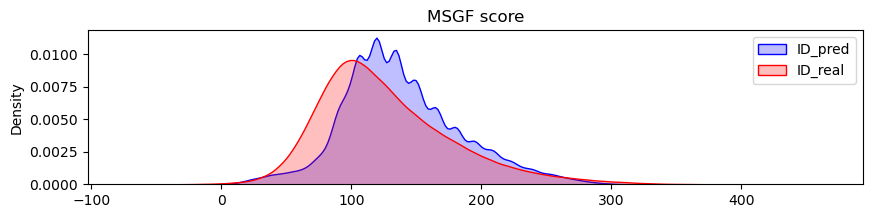

In [6]:
plt.figure(figsize=(10,2))
sns.kdeplot(real_pred_msgf[:, 0], shade=True, color='blue')  # pred

sns.kdeplot(real_pred_msgf[:, 1], shade=True, color='red')  # real
plt.legend(['ID_pred', 'ID_real'])
plt.title('MSGF score')
plt.show()

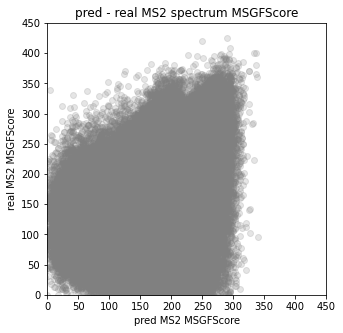

In [8]:
plt.figure(figsize=(5,5))
plt.scatter(real_pred_msgf[:, 0], real_pred_msgf[:, 1], color='gray', alpha=0.2)
plt.xlim(0, 450)
plt.ylim(0, 450)
plt.title('pred - real MS2 spectrum MSGFScore')
plt.xlabel('pred MS2 MSGFScore')
plt.ylabel('real MS2 MSGFScore')
plt.show()

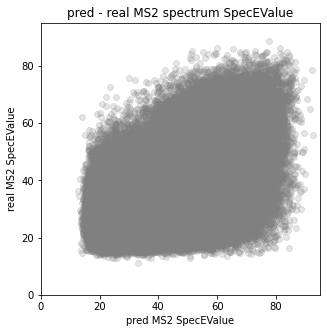

In [15]:
real_pred_SpecEValue = df_id_real_pred[['SpecEValue_pred', 'SpecEValue_real']].values

plt.figure(figsize=(5,5))
plt.scatter(list(map(lambda x: -math.log(x), real_pred_SpecEValue[:, 0])),
            list(map(lambda x: -math.log(x), real_pred_SpecEValue[:, 1])), color='gray', alpha=0.2)
plt.xlim(0, 95)
plt.ylim(0, 95)
plt.title('pred - real MS2 spectrum SpecEValue')
plt.xlabel('pred MS2 SpecEValue')
plt.ylabel('real MS2 SpecEValue')
plt.show()

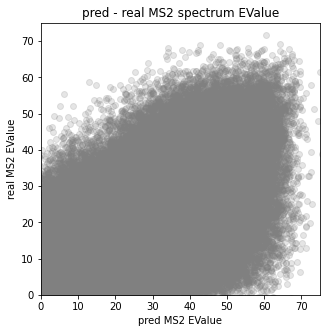

In [16]:
real_pred_EValue = df_id_real_pred[['EValue_pred', 'EValue_real']].values

plt.figure(figsize=(5,5))
plt.scatter(list(map(lambda x: -math.log(x), real_pred_EValue[:, 0])),
            list(map(lambda x: -math.log(x), real_pred_EValue[:, 1])), color='gray', alpha=0.2)
plt.xlim(0, 75)
plt.ylim(0, 75)
plt.title('pred - real MS2 spectrum EValue')
plt.xlabel('pred MS2 EValue')
plt.ylabel('real MS2 EValue')
plt.show()

# 3d : frequency axis add

In [9]:
# ss2freq = {(p, m):0 for p in range(7, 31) for m in range(-48, 356)}
ss2freq = dict()
for sp, sr in df_id_real_pred[['MSGFScore_pred', 'MSGFScore_real']].values:
    if (sp, sr) not in ss2freq:
        ss2freq[(sp, sr)] = 0
    ss2freq[(sp, sr)] += 1

In [10]:
df_id_real_pred_3d = pd.DataFrame([[int(sp), int(sr), f] for (sp, sr), f in ss2freq.items()],
                              columns=['MSGFScore_pred', 'MSGFScore_real', 'Frequency'])

In [11]:
%matplotlib notebook

<IPython.core.display.Javascript object>


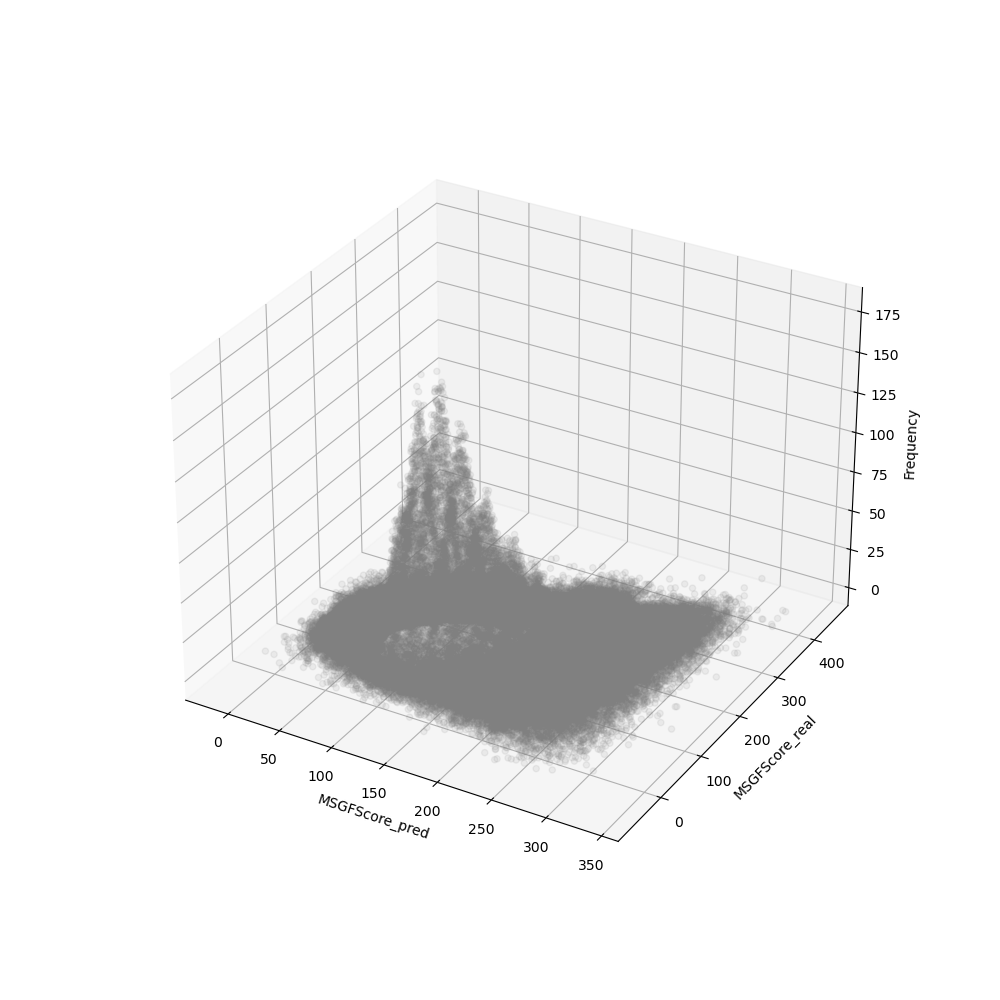

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x = df_id_real_pred_3d.MSGFScore_pred.values
y = df_id_real_pred_3d.MSGFScore_real.values
z = df_id_real_pred_3d.Frequency.values
ax.scatter(x, y, z, alpha = 0.1, color='gray')

ax.set_xlabel('MSGFScore_pred')
ax.set_ylabel('MSGFScore_real')
ax.set_zlabel('Frequency')
plt.show()

# more feature
  - spectrum quality for 3d axis

In [17]:
pc2spec_pred = dict()
for p, c, mz, i in df_id_real_pred[['PEP', 'CHA', 'MZ_pred', 'INT_pred']].values:
    if (p, c) not in pc2spec_pred:
        pc2spec_pred[(p,c)]=dict()
    mz = list(map(lambda x: int(float(x)), mz.split(';')))
    i = list(map(float, i.split(';')))
    for mz_, i_ in zip(mz, i):
        pc2spec_pred[(p,c)][mz_] = i_

In [18]:
pc2spec_real = dict()
for p, c, mz, i in df_id_real_pred[['PEP', 'CHA', 'MZ_real', 'INT_real']].values:
    if (p, c) not in pc2spec_real:
        pc2spec_real[(p,c)]=dict()
    mz = list(map(lambda x: int(float(x)), mz.split(';')))
    i = list(map(float, i.split(';')))
    for mz_, i_ in zip(mz, i):
        pc2spec_real[(p,c)][mz_] = i_

In [19]:
def viz_spec(idx):
    mp, ip, mr, ir, score_p, score_r, pep, cha = df_id_real_pred.iloc[idx][['MZ_pred', 'INT_pred', 'MZ_real', 'INT_real',
                                                                'MSGFScore_pred', 'MSGFScore_real',
                                                               'PEP', 'CHA']].values
    pred_dic = {k:v for k, v in zip(list(map(lambda x: int(float(x)), mp.split(';'))),
                                     list(map(float, ip.split(';'))))}
    pred_arr = np.array(sorted(pred_dic.items()))
    real_dic = {k:v for k, v in zip(list(map(lambda x: int(float(x)), mr.split(';'))),
                                     list(map(lambda x: -float(x) / max(list(map(float, ir.split(';')))), ir.split(';'))))}
    real_arr = np.array(sorted(real_dic.items()))

    plt.figure(figsize=(18,5))
    plt.bar(pred_arr[:, 0],
           pred_arr[:, 1],
            color='darkblue',
    #        ec='none',
           edgecolor='darkblue')
    plt.bar(real_arr[:, 0],
           real_arr[:, 1],
            color='red',
    #        ec='none',
           edgecolor='red')

    plt.title('pred - real MS2 spectrum  ' + pep + str(cha))
    plt.legend(['predMSGF: '+str(score_p), 'realMSGF: '+str(score_r)])
    plt.xlabel('m/z')
    plt.ylabel('intensitiy')
    plt.show()

In [20]:
def norm2(vec):
    return sum([_**2 for _ in vec])**0.5
def dotproduct(v1, v2):
    return sum(np.array(v1)*np.array(v2))
def vec2norm(vec):
    return np.array(vec) / (sum([_**2 for _ in vec])**0.5)
def vec2r_(v1, v2):
    return stats.pearsonr(v1, v2)
def vec2r(v1, v2):
    v1_mean = sum(v1)/len(v1)
    v2_mean = sum(v2)/len(v2)
    
    covdot = dotproduct(np.array(v1)-v1_mean, np.array(v2)-v2_mean)
    v1_std = sum([(_-v1_mean)**2 for _ in v1])**0.5
    v2_std = sum([(_-v2_mean)**2 for _ in v2])**0.5
    return round(covdot / (v1_std*v2_std), 2)

def inv_cos(scalar):
    return math.acos(scalar)

def vec2sa(v1, v2):
    # normalized spectral contrast angle
    v1 = vec2norm(v1)
    v2 = vec2norm(v2)
    # 1 : same vector v1,v2 (high corr) , 0 : low corr (angle theta = 90 degree)
    return round(1 - (2*inv_cos(dotproduct(v1, v2))) / math.pi, 2)

def get_spectrum(pep2spec_pred, pep2spec_expe):
    
    # get whole spectrum prediction
    whole_pep2spec_pred = dict()
    
    for pc, mz2int in pep2spec_pred.items():
        c_pred = dict()
        # scaling int scale
        for mz, i in zip(list(mz2int.keys()),
                         list(mz2int.values())):
            if int(mz) not in c_pred:
                c_pred[int(mz)]=[]
            c_pred[int(mz)].append(i)
        for k, v in c_pred.items():
            c_pred[k] = max(v)
            
        whole_pep2spec_pred[pc] = c_pred
        
    # get whole spectrum experiment
    whole_pep2spec_expe = dict()
    
    for pc, mz2int in pep2spec_expe.items():
        c_expe = dict()
        # initialize with prediction spectrum m/z
        for init_k in whole_pep2spec_pred[pc].keys():
            c_expe[init_k] = [0]
        # scaling int scale
        for mz, i in zip(list(mz2int.keys()), 
                        list(mz2int.values())):
            if int(mz) in whole_pep2spec_pred[pc].keys():
                c_expe[int(mz)].append(i)
        for k, v in c_expe.items():
            c_expe[k] = max(v)

        max4norm = max(c_expe.items(), key=lambda x: x[1])[1]
        for k, v in c_expe.items():
            if max4norm != 0:
                c_expe[k] = v / max4norm
            else:
                c_expe[k] = v
        
        whole_pep2spec_expe[pc] = c_expe

    return whole_pep2spec_pred, whole_pep2spec_expe

In [21]:
wpc2spec_pred, wpc2spec_real = get_spectrum(pc2spec_pred, pc2spec_real)

In [22]:
prosit_eval = dict()
for pc, mz2int_pred in wpc2spec_pred.items():
    mz2int_real = wpc2spec_real[pc]
    v1 = list(mz2int_pred.values())
    v2 = list(mz2int_real.values())
    
    if pc not in prosit_eval:
        prosit_eval[pc] = dict()
    prosit_eval[pc]['R'] = round(vec2r_(v1, v2)[0], 2)
    prosit_eval[pc]['SA'] = vec2sa(v1, v2)

In [23]:
r_viz = [_['R'] for _ in prosit_eval.values()]
sa_viz = [_['SA'] for _ in prosit_eval.values()]

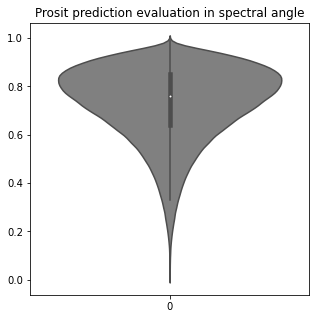

In [24]:
plt.figure(figsize=(5,5))
sns.violinplot(data=sa_viz, color='gray')
plt.title('Prosit prediction evaluation in spectral angle')
plt.show()

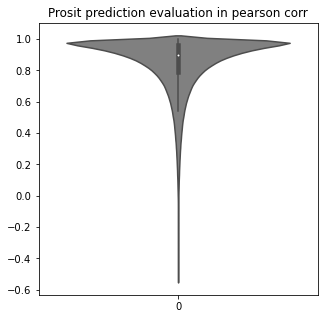

In [25]:
plt.figure(figsize=(5,5))
sns.violinplot(data=r_viz, color='gray')
plt.title('Prosit prediction evaluation in pearson corr')
plt.show()

* see one by one

In [26]:
df_id_real_pred.loc[(df_id_real_pred.MSGFScore_pred<=50) & (df_id_real_pred.MSGFScore_real>=300)]

,Precursor_pred,IsotopeError_pred,PrecursorError(ppm)_pred,Peptide_pred,Protein_pred,MSGFScore_pred,SpecEValue_pred,EValue_pred,MZ_pred,INT_pred,PEP,CHA,Precursor_real,IsotopeError_real,PrecursorError(ppm)_real,Peptide_real,Protein_real,MSGFScore_real,SpecEValue_real,EValue_real,MZ_real,INT_real
247514,1050.8154,0,-0.116167,GQISGEEASDEGEVQGQSQGSSPSFNNLRR,"sp|Q3SY00|T10IP_HUMAN(pre=K,post=R)",5,2.704545e-09,0.074832,175.118952167;1003.5431871669999;1234.62870716...,0.09864078;0.008376792;0.0076534427;0.00521764...,GQISGEEASDEGEVQGQSQGSSPSFNNLRR,3,1050.8154,0,-0.116167,GQISGEEASDEGEVQGQSQGSSPSFNNLRR,"sp|Q3SY00|T10IP_HUMAN(pre=K,post=R)",339,3.552152e-25,9.828428e-18,129.06591796875;141.06593322753906;152.0342864...,56391.62109375;33715.17578125;27058.90234375;2...
299695,1009.8368,0,0.000000,AVDADSGYNAWLSYELQSAAVGARIPFR,"sp|Q9Y5I2|PCDAA_HUMAN(pre=R,post=V)",43,7.823829e-13,0.000021,175.118952167;419.240130167;532.3241941670001;...,0.17867157;0.08115616;0.009228736;0.021744378;...,AVDADSGYNAWLSYELQSAAVGARIPFR,3,1009.8368,0,0.000000,AVDADSGYNAWLSYELQSAAVGARIPFR,"sp|Q9Y5I2|PCDAA_HUMAN(pre=R,post=V)",311,1.088163e-23,2.980386e-16,129.10226440429688;136.075927734375;143.118148...,49320.89453125;45807.59765625;876065.75;55404....
368368,1110.8972,0,-0.109884,DAASLESQLQDTQELLQEETRQKLNLSSR,"sp|P35580|MYH10_HUMAN(pre=K,post=I)",37,3.442979e-11,0.000948,175.118952167;349.18300816699997;689.394063167...,0.10792926;0.020374415;0.015109905;0.009386443...,DAASLESQLQDTQELLQEETRQKLNLSSR,3,1110.8972,0,-0.109884,DAASLESQLQDTQELLQEETRQKLNLSSR,"sp|P35580|MYH10_HUMAN(pre=K,post=I)",310,6.004665e-22,1.653071e-14,101.07111358642578;159.0767059326172;173.12875...,385.56549072265625;5025.70947265625;2113.00683...
607793,1027.8403,0,0.000000,AVDADSGYNAWLSYELQPAASSPRIPFR,"sp|Q9Y5H6|PCDA8_HUMAN(pre=R,post=V)",42,3.000448e-13,0.000008,175.118952167;419.240130167;532.3241941670001;...,0.24973631;0.13442746;0.018691441;0.017757501;...,AVDADSGYNAWLSYELQPAASSPRIPFR,3,1027.8403,0,0.000000,AVDADSGYNAWLSYELQPAASSPRIPFR,"sp|Q9Y5H6|PCDA8_HUMAN(pre=R,post=V)",331,4.475022e-25,1.225670e-17,143.11802673339844;144.12159729003906;159.0764...,1045654.5;47025.3046875;64305.5234375;646980.1...
740546,1039.1685,0,0.000000,AVDADSGYNAWLSYELQPPASSARFPFR,"sp|Q9UN73|PCDA6_HUMAN(pre=R,post=V)",23,4.142993e-11,0.001135,175.118952167;419.240130167;566.308544167;1232...,0.12637144;0.05113769;0.040256202;0.12655602;0...,AVDADSGYNAWLSYELQPPASSARFPFR,3,1039.1685,0,0.000000,AVDADSGYNAWLSYELQPPASSARFPFR,"sp|Q9UN73|PCDA6_HUMAN(pre=R,post=V)",313,4.032578e-28,1.104488e-20,120.08004760742188;129.10159301757812;136.0760...,26266.25390625;24956.103515625;48714.421875;33...


In [27]:
df_id_real_pred.loc[(df_id_real_pred.MSGFScore_pred>=300) & (df_id_real_pred.MSGFScore_real<=50)]

,Precursor_pred,IsotopeError_pred,PrecursorError(ppm)_pred,Peptide_pred,Protein_pred,MSGFScore_pred,SpecEValue_pred,EValue_pred,MZ_pred,INT_pred,PEP,CHA,Precursor_real,IsotopeError_real,PrecursorError(ppm)_real,Peptide_real,Protein_real,MSGFScore_real,SpecEValue_real,EValue_real,MZ_real,INT_real
2812,1150.0435,0,0.000000,HVPDLESGSESGADTISVNQTR,"sp|Q96QB1|RHG07_HUMAN(pre=R,post=V)",306,6.887694e-28,1.825690e-20,175.118952167;276.166631167;404.225209167;518....,0.05233014;0.027772648;0.01977404;0.113255404;...,HVPDLESGSESGADTISVNQTR,2,1150.0435,0,0.000000,HVPDLESGSESGADTISVNQTR,"sp|Q96QB1|RHG07_HUMAN(pre=R,post=V)",33,8.740186e-12,2.316722e-04,110.07097625732422;129.1012725830078;175.11897...,17949.966796875;13417.041015625;12856.109375;1...
62235,1334.1666,0,0.000000,SIELDGTFVGAEAPGELGGLGPGPAEAR,"sp|Q9UPR5|NAC2_HUMAN(pre=K,post=E);tr|F5H6L7|F...",300,9.906272e-34,2.713243e-26,175.118952167;246.156066167;375.198659167;446....,0.050410394;0.11948212;0.00024028933;0.0058154...,SIELDGTFVGAEAPGELGGLGPGPAEAR,2,1334.1666,0,0.000000,SIELDGTFVGAEAPGELGGLGPGPAEAR,"sp|Q9UPR5|NAC2_HUMAN(pre=K,post=E);tr|F5H6L7|F...",38,2.763391e-13,7.568690e-06,173.12828063964844;246.1554718017578;330.16607...,365.72381591796875;350.1393737792969;686.14575...
186072,1630.3569,0,0.000000,QLCEKEPLGNVLFSPICLSTSLSLAQVGAK,"sp|P36952|SPB5_HUMAN(pre=K,post=G);tr|C9JLM5|C...",302,2.065796e-35,5.715837e-28,147.112804167;218.149918167;275.171382167;374....,0.1357881;0.13745697;0.5747007;0.48901704;0.45...,QLCEKEPLGNVLFSPICLSTSLSLAQVGAK,2,1630.3569,0,0.000000,QLCEKEPLGNVLFSPICLSTSLSLAQVGAK,"sp|P36952|SPB5_HUMAN(pre=K,post=G);tr|C9JLM5|C...",15,5.424885e-14,1.501008e-06,374.23858642578125;573.3333129882812;752.33831...,22510.5;23307.349609375;24261.94140625;47752.1...
186469,1377.2413,0,0.000000,TNVILLGDSIGDLTMADGVPGVQNILK,"sp|Q969T7|5NT3B_HUMAN(pre=K,post=I);tr|C9J758|...",304,1.337116e-32,3.643233e-25,147.112804167;260.196868167;373.280932167;487....,0.022842359;0.0532279;0.022037761;0.06851167;0...,TNVILLGDSIGDLTMADGVPGVQNILK,2,1377.2413,0,0.000000,TNVILLGDSIGDLTMADGVPGVQNILK,"sp|Q969T7|5NT3B_HUMAN(pre=K,post=I);tr|C9J758|...",19,3.696597e-12,1.007210e-04,138.05494689941406;216.09788513183594;315.1656...,7776.5849609375;14038.3955078125;24190.4785156...
247983,1459.6594,0,0.000000,DYYNPQPYPSYEGGAGTPSGTAAAVAADK,"sp|Q7Z5J4|RAI1_HUMAN(pre=K,post=Y);tr|A8MXE8|A...",314,3.387392e-37,9.325416e-30,147.112804167;262.139747167;333.176861167;404....,0.07452872;0.12971778;0.16819952;0.39678723;0....,DYYNPQPYPSYEGGAGTPSGTAAAVAADK,2,1459.6594,0,0.000000,DYYNPQPYPSYEGGAGTPSGTAAAVAADK,"sp|Q7Z5J4|RAI1_HUMAN(pre=K,post=Y);tr|A8MXE8|A...",-28,1.588549e-10,4.373240e-03,136.07566833496094;226.11904907226562;251.1015...,11532.529296875;35736.97265625;20715.03125;215...
248163,1432.1287,0,0.000000,EVPEPGTAASGPGEGEGSEYGASGEDALSR,"sp|Q9C0C7|AMRA1_HUMAN(pre=R,post=I);tr|A0A075B...",305,5.084088e-34,1.406713e-26,175.118952167;262.150980167;375.23504416699996...,0.13612211;0.1085912;0.14204942;0.4533398;0.20...,EVPEPGTAASGPGEGEGSEYGASGEDALSR,2,1432.1287,0,0.000000,EVPEPGTAASGPGEGEGSEYGASGEDALSR,"sp|Q9C0C7|AMRA1_HUMAN(pre=R,post=I);tr|A0A075B...",-21,6.254650e-10,1.730595e-02,227.1013946533203;446.27203369140625;834.39416...,7150.7041015625;14696.4765625;17914.447265625;...
311777,1407.7131,0,0.000000,LSAQGQAISVVGSLSSMSPLEEEAPQAK,"sp|Q92797|SYMPK_HUMAN(pre=R,post=R);tr|A0A087W...",303,2.284724e-29,6.257664e-22,147.112804167;218.149918167;346.20849616699996...,0.04870166;0.082475685;0.02806206;1.0;0.315924...,LSAQGQAISVVGSLSSMSPLEEEAPQAK,2,1407.7131,0,0.000000,LSAQGQAISVVGSLSSMSPLEEEAPQAK,"sp|Q92797|SYMPK_HUMAN(pre=R,post=R);tr|A0A087W...",46,2.275644e-15,6.232792e-08,443.25848388671875;656.3312377929688;1111.5623...,7404.150390625;2585.84619140625;5076.120605468...
434191,1418.6254,0,0.000000,MMSTESANSFTLIGEASDGGTMENLSR,"sp|Q14457|BECN1_HUMAN(pre=R,post=R)",300,1.450067e-34,3.950990e-27,175.118952167;262.150980167;375.23504416699996...,0.10913226;0.09834877;0.04800128;0.14307313;0....,MMSTESA

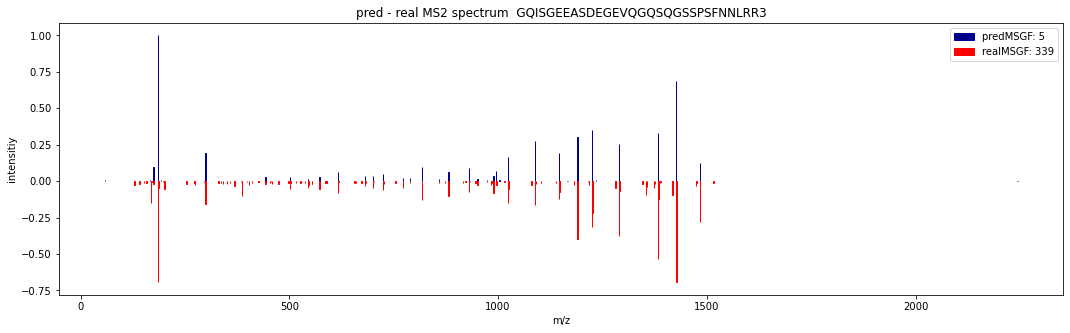

In [28]:
viz_spec(247514)

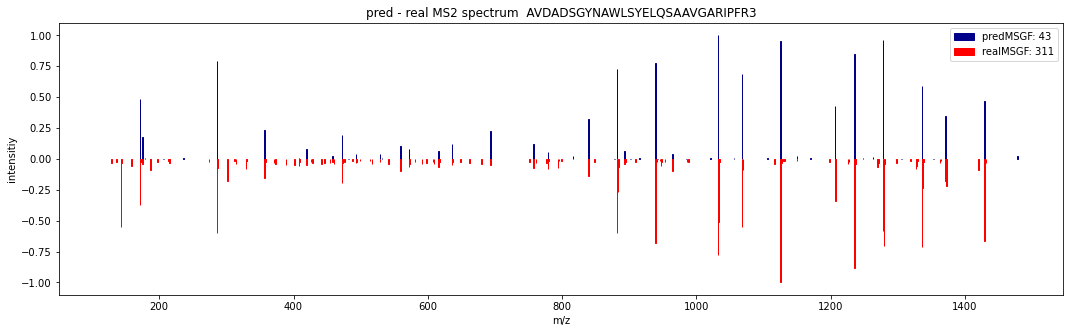

In [29]:
viz_spec(299695)

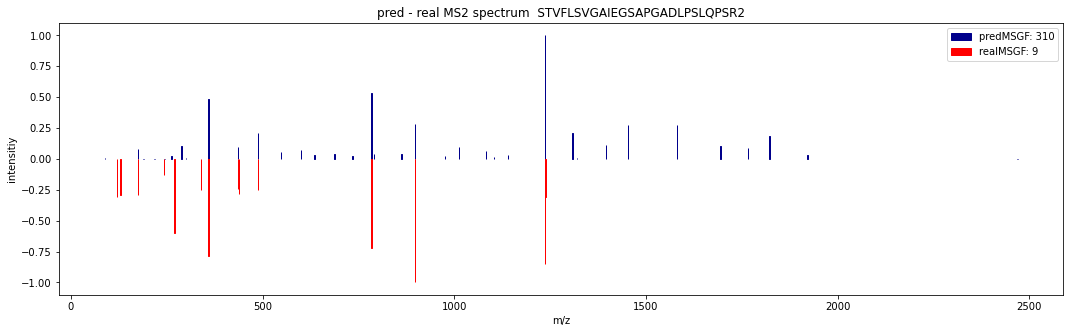

In [30]:
viz_spec(559114)

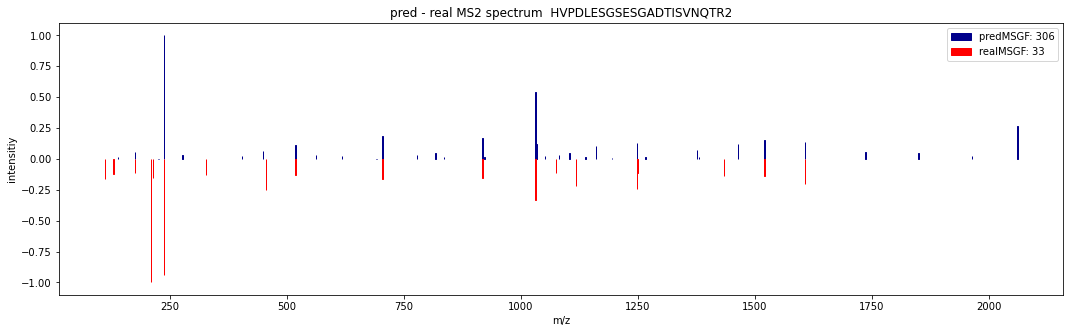

In [31]:
viz_spec(2812)

# 3d : spectrum angle axis add

In [35]:
df_id_real_pred.head(1)

,Precursor_pred,IsotopeError_pred,PrecursorError(ppm)_pred,Peptide_pred,Protein_pred,MSGFScore_pred,SpecEValue_pred,EValue_pred,MZ_pred,INT_pred,PEP,CHA,Precursor_real,IsotopeError_real,PrecursorError(ppm)_real,Peptide_real,Protein_real,MSGFScore_real,SpecEValue_real,EValue_real,MZ_real,INT_real
0,1148.5422,0,0.0,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,"sp|P07858|CATB_HUMAN(pre=R,post=I);tr|R4GMQ5|R...",213,3.842356e-39,1.063139e-31,147.112804167;294.18121816699994;441.249632166...,0.24706785;0.4907155;0.21187675;0.36394352;0.4...,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,3,1148.5422,0,0.0,ILGWGVENGTPYWLVANSWNTDWGDNGFFK,"sp|P07858|CATB_HUMAN(pre=R,post=I);tr|R4GMQ5|R...",79,2.073257e-16,5.736481e-09,120.08077239990234;126.05509185791016;129.1025...,23000.103515625;14412.4521484375;16642.2246093...


In [34]:
prosit_eval

{('ILGWGVENGTPYWLVANSWNTDWGDNGFFK', 3): {'R': 0.88, 'SA': 0.69},
 ('PYFLTDGTGTVTPANASGINDGAAAVVLMK', 3): {'R': 0.86, 'SA': 0.72},
 ('EANFDINQLYDCNWVVVNCSTPGNFFHVLR', 3): {'R': 0.9, 'SA': 0.74},
 ('NKDDECFGDDIEEIPDTDFDFEGNLALFDK', 3): {'R': 0.89, 'SA': 0.75},
 ('VLTDILNAMDIFIELVTNPDGFAFTHSMNR', 3): {'R': 0.94, 'SA': 0.82},
 ('SSCAFAGGYGGGFGSGYGGGFGGGFGGGR', 2): {'R': 0.9, 'SA': 0.78},
 ('QTMAEVFEKEQSICAAEEQPAEDGQGETNK', 3): {'R': 0.98, 'SA': 0.88},
 ('QPNCDDPETEEAALVAIDYINQNLPWGYK', 3): {'R': 0.89, 'SA': 0.73},
 ('VATFLNYMSDVEAGGATVFPDLGAAIWPK', 3): {'R': 0.94, 'SA': 0.8},
 ('QASSAPLFMLDLYNAMTNEENPEESEYSVR', 3): {'R': 0.85, 'SA': 0.67},
 ('GSLFQVASLQDCFLQQSEPLAATGTGDFNR', 2): {'R': 0.98, 'SA': 0.9},
 ('HGMTLTSMYQNSNIQIHHYPNGIVTVNCAR', 4): {'R': 0.88, 'SA': 0.72},
 ('CAVGAACQPFHFYFPTPTVLCNEIWTHSYK', 3): {'R': 0.92, 'SA': 0.78},
 ('QAGEAHMAADGETNGSCENSDASSHANAAK', 3): {'R': 0.84, 'SA': 0.71},
 ('LLKEEDMTKVEFETSEEVDVTPTFDTMGLR', 3): {'R': 0.98, 'SA': 0.89},
 ('PTLRFPDDQVNNTIQNGGGDDLSNQELIG

In [37]:
print(df_id_real_pred.shape[0],
      len({(p,c) for p, c in df_id_real_pred[['PEP' ,'CHA']].values}))

744033 744033


In [47]:
%matplotlib notebook

In [48]:
df_3d_angle = pd.DataFrame([[msgfp, msgfr, prosit_eval[(p,c)]['R']]
                            for msgfp, msgfr, p, c in df_id_real_pred[['MSGFScore_pred', 'MSGFScore_real', 'PEP', 'CHA']].values],
                          columns=['MSGFScore_pred', 'MSGFScore_real', 'SpectrumAngle'])

<IPython.core.display.Javascript object>


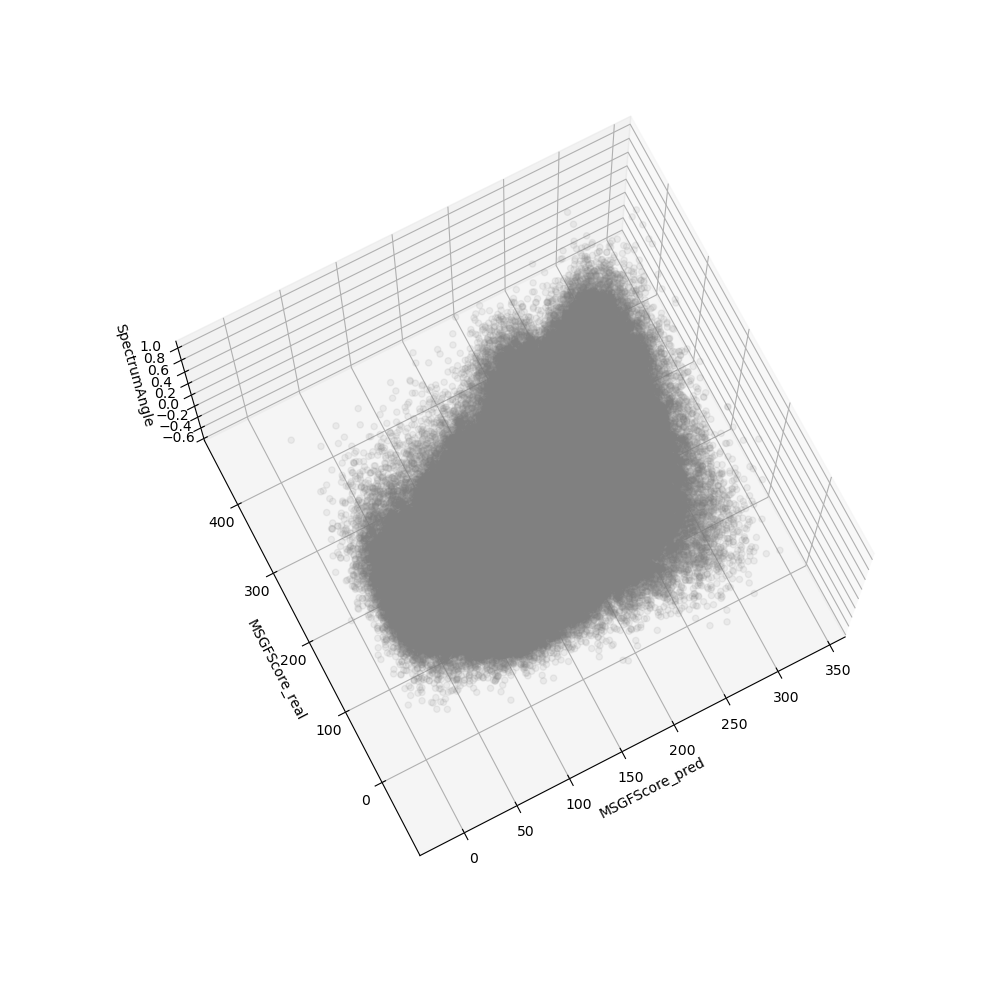

In [49]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x = df_3d_angle.MSGFScore_pred.values
y = df_3d_angle.MSGFScore_real.values
z = df_3d_angle.SpectrumAngle.values
ax.scatter(x, y, z, alpha = 0.1, color='gray')

ax.set_xlabel('MSGFScore_pred')
ax.set_ylabel('MSGFScore_real')
ax.set_zlabel('SpectrumAngle')
plt.show()